In [1]:

"""
Created on Tue Sep 17 13:17:44 2019

@author: MatthewOliver
"""

"""
API calls to OMDb for tv_show data.
Matt Oliver Taylor Appel
"""
import csv
import numpy as np
import matplotlib.pyplot as plt
import omdb
import time
import pandas as pd
import mysql.connector
from config import pword, host, user, api_key
import Project_1_Webscrape_Functions as web

# define omdb client for API calls
client=omdb.OMDBClient(apikey=api_key)

def omdb_call(tv_title, tv_year):
    '''
    takes in a key to the api, a title of a tv show, and the year it was released
    returns all the imdb data from the omdb API
    '''
    int_year=int(tv_year)
    data = client.get(title=tv_title,  #omdb.OMDBC requires a tv title and a release year
                      year=tv_year,
                      tomatoes=False) #tomatoes is a parameter that returns rotten tomatoes data
    return data

def get_tvshow_data(listy,year):
    '''
    takes in a list of tv shows released in the same year, and a key to the api,
    returns a Pandas Data Frame of all the imdb info on the shows
    '''
    results=[]
    for i, show in enumerate(listy):
        print(str(i)+show)
        results.append(omdb_call(show,year))
        time.sleep(.1) #wait 50 milliseconds
    return pd.DataFrame(results)

def ship_2_sql(dflisty):
    '''
    takes in a tv show dataframe then sends the data into AWS tv show database
    first doing the merchendise data
    '''
    cnx = mysql.connector.connect(
    #connect to mysql platform        
        host =host,
        user =user,
        passwd = pword
        )
    cur=cnx.cursor()
    cur.execute('USE tv_merch')
    for i, show in dflisty.iterrows():
        print(i)
    # first pass the show data into sql
#         cur.execute("""INSERT INTO show_data (
#                                     show_id,
#                                     show_name,
#                                     genre,
#                                     imdb_rating,
#                                     imdb_votes,
#                                     metascore,
#                                     released,
#                                     rated
#                                     ) 
#         VALUES ("{}","{}","{}","{}","{}","{}","{}","{}"
#         )""".format(show['imdb_id'],
#                     show['title'],
#                     show['genre'],
#                     show['imdb_rating'],
#                     show['imdb_votes'],
#                     show['metascore'],
#                     show['year'],
#                     show['rated']))
#     then pass the sales data into sql
        cur.execute("""INSERT INTO merch_data (
                                    show_id,
                                    etsy,
                                    ebay,
                                    bonanza,
                                    show_name
                                    ) 
        VALUES ({},{},{},{},{}
        )""".format(show['imdb_id'],
                    show['etsy'],
                    show['ebay'],
                    show['bonanza'],
                    show['title']))
    cnx.commit()
    cur.close()
    cnx.close()
    

    
    

'''
#test code
show_name = str(input('Name: \n'))
show_year = str(input('Year: \n'))

df = pd.DataFrame(omdb_call( api_key, show_name,show_year))
df.head(1)
'''





#brings all programs together, creating cumulative dataframe and saving to SQL

'''
shows_by_year=web.tv_list_makr()
imdb_data_by_year=[]
# for i, year in enumerate(shows_by_year[9:]):
#     imdb_data_by_year.append(get_tvshow_data(year,2019+i))
frames=[                imdb_data_by_year[1],
                        imdb_data_by_year[2],
                        imdb_data_by_year[3],
                        imdb_data_by_year[4],
                        imdb_data_by_year[5],
                        imdb_data_by_year[6],
                        imdb_data_by_year[7],
                        imdb_data_by_year[8],
                        imdb_data_by_year[9],
                        imdb_data_by_year[10]]
show_data=pd.concat(frames)
show_data['year']
'''


#quick look for element in merch data 
'''
data.drop([86],inplace=True) #unwanted column
j=3
print(data['title'][j])
print(bonanza[j]['result'][0]['Results'])
print(ebay[j]['result'][0]['Results'])
print(etsy[j]['result'][0]['Results'])
'''


#import ebay, etsy and bonanza data into show dataframe
'''
result=lambda x:x['result'][0]['Results']
data['ebay']=[result(ebay[i]) for i in range(len(ebay))]
data['etsy']=[result(etsy[i]) for i in range(len(etsy))]
data['bonanza']=[result(bonanza[i]) for i in range(len(bonanza))]
'''

#dropping unwanted columns
'''
drop_me=['awards',
         'actors',
         'box_office',
         'country',
         'director',
         'dvd',
         'language',
         'metascore',
         'plot',
         'poster',
         'production',
         'response',
         'total_seasons',
         'ratings',
         'type',
         'website',
         'writer']
data.drop(drop_me, axis=1,inplace=True)
'''

#save dataframe
'''
data=pd.read_csv('tv_show_data.csv')
'''

# #data exploration tool
# gimme= ['title','ebay','etsy','bonanza','imdb_votes','imdb_rating','year']
# data[gimme].sort_values(['ebay'],ascending=False)[200:250]
    
# #cleaning etsy data
# etsy_filter=lambda x,y,z: np.NaN if (x>100)and(z<=4)and(y<10) else x
# etsy_high_clip=lambda x: 0 if x>40000 else x
# data['etsy2']=[etsy_medium_clip(data['etsy'][i],data['bonanza']
#[i],data['ebay'][i]) for i in range(len(data['etsy']))]

# #change column type
# data['imdb_votes']=data['imdb_votes'].map(lambda x: x.replace(',','')if type(x)==str else x)
# data['imdb_votes']=data['imdb_votes'].astype(dtype='float64',errors='raise')

#scale the review data for comparison
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
temp_scaled = scaler.fit(temp)
scaled=pd.DataFrame(temp_scaled.transform(temp), columns = ['ebay','etsy2','bonanza','imdb_votes'])
'''

'''

'''
#heat plot of correlation
corr_data=scaled[['ebay','etsy2','bonanza','scaled_total','imdb_votes']]
corr_data['imdb_rating']=data['imdb_rating']
pearsoncorr_scaled= corr_data.corr()
sb.heatmap(pearsoncorr_scaled, 
            xticklabels=pearsoncorr_scaled.columns,
            yticklabels=pearsoncorr_scaled.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)
'''

'''
# create table with both scaled and normal data including genre data
genres=[]

for i, show in data.iterrows():
    if type(data['genre'][i])==list:
        for j in range(len(data['genre'][i])):
#             data['genre'][i][j]=data['genre'][i][j].strip()
            stuff={'imdb_id':data['imdb_id'][i],
                   'genre':data['genre'][i][j],
                   'rating':data['imdb_rating'][i],
                   'votes':data['imdb_votes'][i],
                   'etsy2':data['etsy2'][i]/102.1,
                   'ebay':data['ebay'][i]/292.4,
                   'unscaled_total':data['unscaled_total'][i],
                   'bonanza':data['bonanza'][i]/4.851,
                   's_etsy2':scaled['etsy2'][i],
                   's_ebay':scaled['ebay'][i],
                   's_bonanza':scaled['bonanza'][i],
                   's_votes':scaled['imdb_votes'][i],
                   'scaled_total':data['scaled_total'][i],
                   'total_div_votes':(data['unscaled_total'][i])/data['imdb_votes'][i]
                  }
            
            genres.append(stuff)
            print(i,j,data['genre'][i][j]) 
    else:
        pass
        
#plot scaled genre data
genres_data=pd.DataFrame(genres)
genre_plot_data=genres_data.groupby(['genre']).mean().sort_values(['scaled_total'],ascending=False)
genre_plot_data.plot.bar(y=['scaled_total','s_votes'])
'''

NameError: name 'data' is not defined

In [206]:
scaled.columns

Index(['ebay', 'etsy2', 'bonanza', 'imdb_votes', 'scaled_total',
       'unscaled_total'],
      dtype='object')

In [ ]:
gimme= ['title','ebay','etsy2','bonanza','imdb_votes','imdb_rating','year']
data[gimme].sort_values(['imdb_votes'],ascending=False)[0:50]

In [239]:
data['imdb_votes']=data['imdb_votes'].map(lambda x: x.replace(',','')if type(x)==str else x)
data['imdb_votes']=data['imdb_votes'].astype(dtype='float64',errors='raise')

In [70]:
genres=[]
for i, show in data.iterrows():
    if type(data['genre'][i])==list:
        for j in range(len(data['genre'][i])):
            genres.append(data['genre'][i][j])
            show['imdb_id']
            print(i,j,data['genre'][i][j])
    else:
        pass

In [225]:
genres=[]

for i, show in data.iterrows():
    if type(data['genre'][i])==list:
        for j in range(len(data['genre'][i])):
#             data['genre'][i][j]=data['genre'][i][j].strip()
            stuff={'imdb_id':data['imdb_id'][i],
                   'genre':data['genre'][i][j],
                   'rating':data['imdb_rating'][i],
                   'votes':data['imdb_votes'][i],
                   'etsy2':data['etsy2'][i]/102.1,
                   'ebay':data['ebay'][i]/292.4,
                   'unscaled_total':data['unscaled_total'][i],
                   'bonanza':data['bonanza'][i]/4.851,
                   's_etsy2':scaled['etsy2'][i],
                   's_ebay':scaled['ebay'][i],
                   's_bonanza':scaled['bonanza'][i],
                   's_votes':scaled['imdb_votes'][i],
                   'scaled_total':data['scaled_total'][i],
                   'total_div_votes':(data['unscaled_total'][i])/data['imdb_votes'][i]
                  }
            
            genres.append(stuff)
            print(i,j,data['genre'][i][j]) 
    else:
        pass

0 0 Drama
1 0 Documentary
1 1 Reality-TV
2 0 Documentary
3 0 Crime
3 1 Drama
3 2 Mystery
3 3 Thriller
4 0 Comedy
4 1 Music
4 2 Talk-Show
5 0 Documentary
5 1 Crime
6 0 Reality-TV
7 0 Game-Show
7 1 Reality-TV
8 0 Action
8 1 Crime
8 2 Drama
9 0 Documentary
10 0 News
10 1 Talk-Show
11 0 Game-Show
11 1 Reality-TV
12 0 Animation
12 1 Adventure
12 2 Comedy
12 3 Drama
12 4 Family
12 5 Fantasy
12 6 Musical
12 7 Sci-Fi
13 0 Documentary
13 1 Adventure
13 2 Biography
13 3 Crime
13 4 History
13 5 Mystery
14 0 Reality-TV
15 0 Reality-TV
16 0 Reality-TV
17 0 Reality-TV
18 0 Action
18 1 Reality-TV
19 0 Talk-Show
20 0 Reality-TV
21 0 Drama
21 1 Horror
21 2 Thriller
22 0 Documentary
22 1 Biography
22 2 History
23 0 Comedy
23 1 Game-Show
23 2 Reality-TV
24 0 Reality-TV
25 0 Animation
25 1 Adventure
25 2 Comedy
25 3 Family
25 4 Fantasy
25 5 Romance
26 0 Drama
26 1 Horror
26 2 Thriller
27 0 Reality-TV
28 0 Animation
28 1 Comedy
29 0 Biography
29 1 Comedy
29 2 Drama
29 3 Reality-TV
30 0 Horror
30 1 Reality-

379 0 Drama
379 1 Horror
379 2 Thriller
380 0 Action
380 1 Drama
380 2 Sci-Fi
381 0 Action
381 1 Drama
381 2 War
382 0 Reality-TV
383 0 Crime
383 1 Drama
383 2 Mystery
383 3 Thriller
384 0 Comedy
384 1 Game-Show
385 0 Crime
385 1 Drama
386 0 Animation
386 1 Action
386 2 Adventure
386 3 Family
386 4 Sci-Fi
387 0 Animation
387 1 Adventure
387 2 Family
387 3 Western
388 0 Action
388 1 Adventure
388 2 Drama
388 3 Sci-Fi
389 0 News
389 1 Talk-Show
390 0 Reality-TV
391 0 Action
391 1 Adventure
391 2 Crime
391 3 Drama
391 4 Thriller
392 0 Drama
393 0 Animation
393 1 Adventure
393 2 Comedy
393 3 Family
393 4 Fantasy
393 5 Musical
394 0 Animation
395 0 Documentary
395 1 History
396 0 Animation
396 1 Action
396 2 Comedy
396 3 Family
396 4 Fantasy
397 0 Animation
397 1 Family
397 2 Fantasy
397 3 Musical
398 0 Short
398 1 Comedy
399 0 Family
399 1 Game-Show
399 2 Reality-TV
400 0 Comedy
401 0 Animation
401 1 Action
401 2 Comedy
401 3 Family
401 4 Fantasy
401 5 Sci-Fi
402 0 Short
402 1 Game-Show
40

649 0 Comedy
650 0 Comedy
651 0 Game-Show
652 0 Talk-Show
653 0 Reality-TV
654 0 Reality-TV
655 0 Comedy
655 1 Reality-TV
656 0 Comedy
656 1 Family
657 0 Animation
657 1 Adventure
657 2 Comedy
657 3 Family
657 4 Music
658 0 Comedy
659 0 Talk-Show
660 0 Reality-TV
661 0 Reality-TV
662 0 Crime
662 1 Drama
663 0 Animation
663 1 Action
663 2 Adventure
663 3 Comedy
663 4 Family
663 5 Fantasy
664 0 Drama
664 1 Fantasy
664 2 Horror
664 3 Mystery
664 4 Sci-Fi
664 5 Thriller
665 0 Action
665 1 Adventure
665 2 Comedy
665 3 Drama
665 4 Fantasy
665 5 Sci-Fi
666 0 Reality-TV
667 0 Animation
667 1 Drama
667 2 Fantasy
668 0 Comedy
668 1 Crime
668 2 Drama
668 3 Mystery
668 4 Thriller
669 0 Comedy
669 1 Reality-TV
670 0 Action
670 1 Crime
670 2 Drama
670 3 History
671 0 News
672 0 Comedy
672 1 Sci-Fi
673 0 Comedy
673 1 Fantasy
673 2 Horror
674 0 Drama
674 1 Family
675 0 Animation
676 0 Comedy
676 1 Crime
676 2 Drama
677 0 Reality-TV
678 0 Family
678 1 Game-Show
678 2 Reality-TV
679 0 Action
679 1 Crime

In [226]:
genres_data=pd.DataFrame(genres)

In [227]:
genres_data.columns

Index(['bonanza', 'ebay', 'etsy2', 'genre', 'imdb_id', 'rating', 's_bonanza',
       's_ebay', 's_etsy2', 's_votes', 'scaled_total', 'total_div_votes',
       'unscaled_total', 'votes'],
      dtype='object')

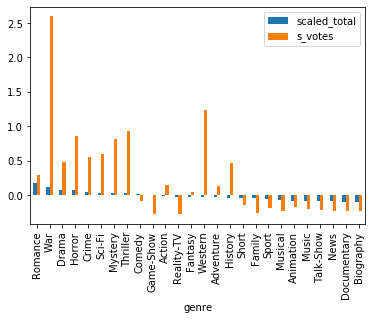

In [232]:
genres_data=pd.DataFrame(genres)
genre_plot_data=genres_data.groupby(['genre']).mean().sort_values(['scaled_total'],ascending=False)
genre_plot_data.plot.bar(y=['scaled_total','s_votes'])

ValueError: shape mismatch: objects cannot be broadcast to a single shape

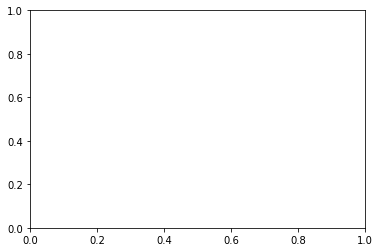

In [241]:

# labels = ['genre']
merch_searches = genre_plot_data['scaled_total'][:]
imdb_votes = genre_plot_data['s_votes'][:]

x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, merch_searches, width, label='Scaled searches')
rects2 = ax.bar(x + width/2, imdb_votes, width, label='imdb votes')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scaled total')
ax.set_title('Merchandising by Genre')
ax.set_xticks(x)
# ax.set_xticklabels(labels)
ax.legend()


# def autolabel(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')


# autolabel(rects1)
# autolabel(rects2)

# fig.tight_layout()

plt.show()

In [175]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [163]:
cumu_unscaled=[]
for i, show in scaled.iterrows():
    total=0
    count=0
    if data['etsy2'][i]>=-100:
        total+=data['etsy2'][i]/102.1
        count+=1
    if data['ebay'][i]>=-100:
        total+=data['ebay'][i]/292.4
        count+=1
    if data['bonanza'][i]>=-100:
        total+=data['bonanza'][i]/4.851
        count+=1
    cumu_unscaled.append(total/count)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  if sys.path[0] == '':


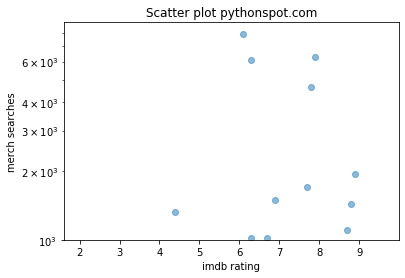

In [201]:

# Create data
N = 500
y = data['etsy2']
x = data['imdb_rating']

# Plot
plt.scatter(x, y, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.ylabel('merch searches')
plt.xlabel('imdb rating')
plt.yscale('log')
plt.ylim([0,1000])
plt.show()

In [103]:
len(cumu_scaled)

680

In [52]:
temp = temp[['ebay','etsy2','bonanza','imdb_votes']]

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
temp_scaled = scaler.fit(temp)
scaled=pd.DataFrame(temp_scaled.transform(temp), columns = ['ebay','etsy2','bonanza','imdb_votes'])

In [55]:
temp_scaled = scaler.fit(temp)

In [56]:
scaled=pd.DataFrame(temp_scaled.transform(temp), columns = ['ebay','etsy2','bonanza','imdb_votes'])

In [57]:
print(scaled['ebay'][10],(data['ebay'][10]-292.4)/(3169.8))

-0.09231635006069887 -0.09224556754369359


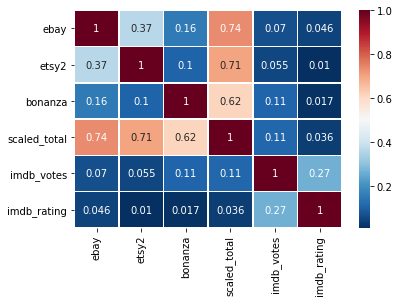

In [182]:
corr_data=scaled[['ebay','etsy2','bonanza','scaled_total','imdb_votes']]
corr_data['imdb_rating']=data['imdb_rating']
pearsoncorr_scaled= corr_data.corr()
sb.heatmap(pearsoncorr_scaled, 
            xticklabels=pearsoncorr_scaled.columns,
            yticklabels=pearsoncorr_scaled.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [236]:
gimme= ['title','ebay','etsy2','bonanza','imdb_votes','imdb_rating','scaled_total','scaled_total']
data[gimme].sort_values(['bonanza'],ascending=False)[0:50]

,title,ebay,etsy2,bonanza,imdb_votes,imdb_rating,scaled_total,scaled_total
54,Tanked,11435,1018.0,1235,1380.0,6.7,9.703838,9.703838
621,NOS4A2,22,0.0,286,3783.0,6.8,1.782145,1.782145
150,The Flash,2445,240.0,194,280881.0,7.8,1.536980,1.536980
131,The 100,770,443.0,194,183404.0,7.7,1.451438,1.451438
540,You,9813,4634.0,142,68570.0,7.8,3.932889,3.932889
21,The Walking Dead,3261,602.0,105,796251.0,8.3,1.197034,1.197034
169,Power,4185,543.0,104,31318.0,8.2,1.261300,1.261300
58,Arrow,3212,155.0,63,383655.0,7.6,0.714796,0.714796
643,Schooled,2500,1498.0,58,1619.0,6.9,1.207096,1.207096
562,The Boys,196,1945.0,55,73831.0,8.9,1.144607,1.144607


In [ ]:
def ship_2_sql2(dflisty):
    '''
    takes in a tv show dataframe then sends the data into AWS tv show database
    first doing the merchendise data
    '''
    cnx = mysql.connector.connect(
    #connect to mysql platform        
        host =host,
        user =user,
        passwd = pword
        )
    cur=cnx.cursor()
    cur.execute('USE tv_merch')
#     for i, show in dflisty.iterrows():
#         print(i,show['title'])
# #      first pass the show data into sql
# #         cur.execute("""TRUNCATE TABLE show_data"""
# #      then pass the sales data into sql
#         cur.execute("""INSERT INTO show_data (
#                                     show_id,
#                                     show_name,
#                                     rated,
#                                     released,
#                                     imdb_rating,
#                                     imdb_votes
#                                     ) 
#         VALUES ("{}","{}","{}","{}",{},{}
#         )""".format(show['imdb_id'],
#                     show["title"],
#                     show['rated'],
#                     show['year'],
#                     show['imdb_rating'],
#                     show['imdb_votes']
#                        ))
    cnx.commit()
    cur.close()
    cnx.close()